# Visual Understanding of Data (EDA) for Real Estate Pricing

#### We need to import the necessary libraries to perform the EDA part, for that we need below libraries
* Pandas :- For importing, Data Cleaning, Data modification and Data analysis
* Seaborn :- Ploting a Graph for data visualization
* MatPlotlib :- By adding multiple functionality we can make Graph attractive

## 1. Loading the Data 

##### First we need to Import the Pandas library to Load our Housing Data

In [3]:
import pandas as pd

df = pd.read_csv('housing_data.csv') 
print(df.shape)

(1460, 81)


## 2. Cleaning the Data

#### We can handle the missing or duplicate value by different method

In [4]:
print(df.isna().sum().sort_values(ascending=False).head(10))

Alley          1369
MasVnrType      872
GarageYrBlt      81
Electrical        1
Unnamed: 0        0
LotArea           0
MSSubClass        0
LotFrontage       0
MSZoning          0
Utilities         0
dtype: int64


In [5]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])

In [6]:
# Remove duplicates
df = df.drop_duplicates()

# Basic anomaly check
print(df.describe())

        Unnamed: 0  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    729.500000    57.623288   10516.828082     6.099315     5.575342   
std     421.610009    34.664304    9981.264932     1.382997     1.112799   
min       0.000000     0.000000    1300.000000     1.000000     1.000000   
25%     364.750000    42.000000    7553.500000     5.000000     5.000000   
50%     729.500000    63.000000    9478.500000     6.000000     5.000000   
75%    1094.250000    79.000000   11601.500000     7.000000     6.000000   
max    1459.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315  ...   
std      30.202904     20.645407   180.731373   456.098091   161.319273  ..

## 3. Univariate Analysis

#### Skewness & Kurtosis
- Plot the Histrogram for Sales Price Distirbution
- Checking the Skewness and Kurtosis for the Sales Price 

SalePrice skewness: 1.88
SalePrice kurtosis: 6.54


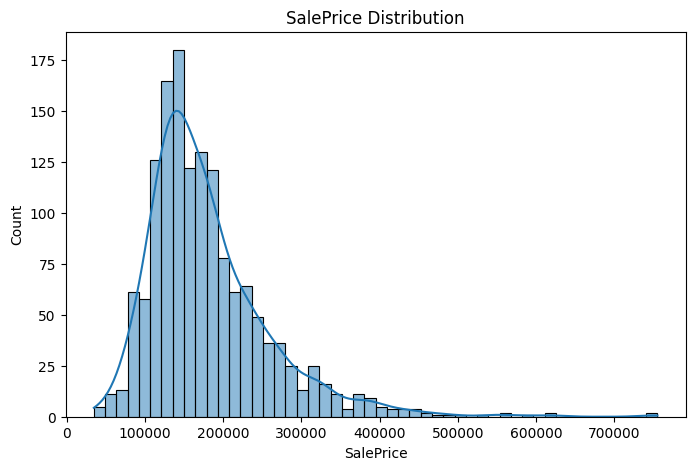

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check skewness and kurtosis
skewness = df['SalePrice'].skew()
kurtosis = df['SalePrice'].kurtosis()
print(f"SalePrice skewness: {skewness:.2f}")
print(f"SalePrice kurtosis: {kurtosis:.2f}")

plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], kde=True, bins=50)
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.show()

## 4. Multivariate Analysis

#### Scatter Plot : uses dots to represent values for two different numeric variables
Below are some visualization via scatter plot which are compared with the Sales Price
* GrLivArea :- Above grade (ground) living area square feet
* TotalBsmtSF :- Total square feet of basement area
* YearBuilt :- Original construction Year 

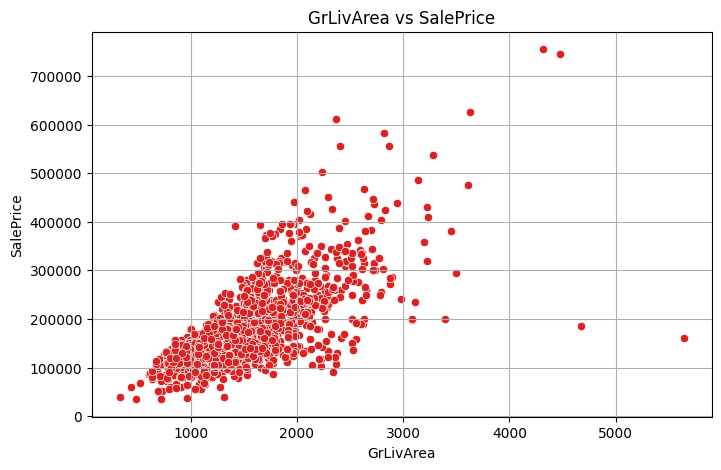

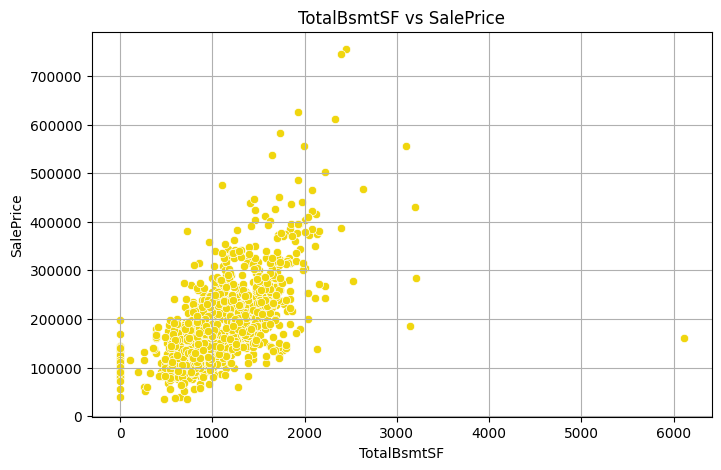

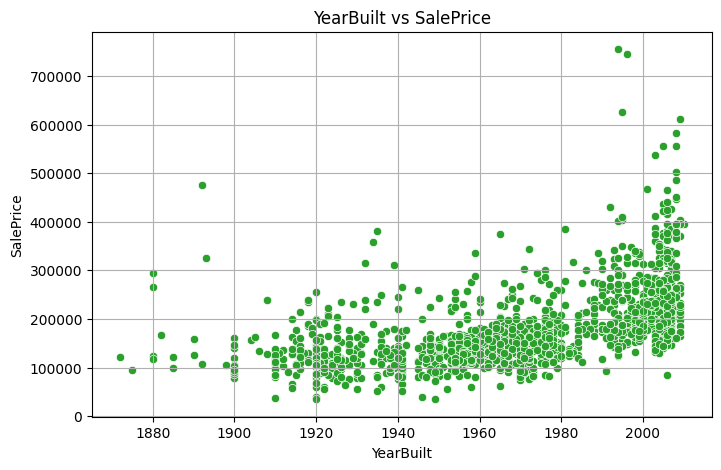

In [8]:
colors = ["#dc2121", "#f0d60e", '#2ca02c'] 

features = ['GrLivArea', 'TotalBsmtSF', 'YearBuilt']
for i, feature in enumerate(features):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df['SalePrice'], color=colors[i])
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.grid(True)
    plt.show()

#### Correlation Matrix : The Heatmap is the best Example to check the Relation between different variables
Below are some Features which used in HEATMAP to show the Relation to each other
1. SalePrice :- Sales Price
2. GrLivArea :- Above grade (ground) living area square feet
3. TotalBsmtSF :- Total square feet of basement area
4. 1stFlrSF :- First Floor square feet
5. GarageArea :- Size of garage in square feet
6. OverallQual :- Rates the overall material and finish of the house

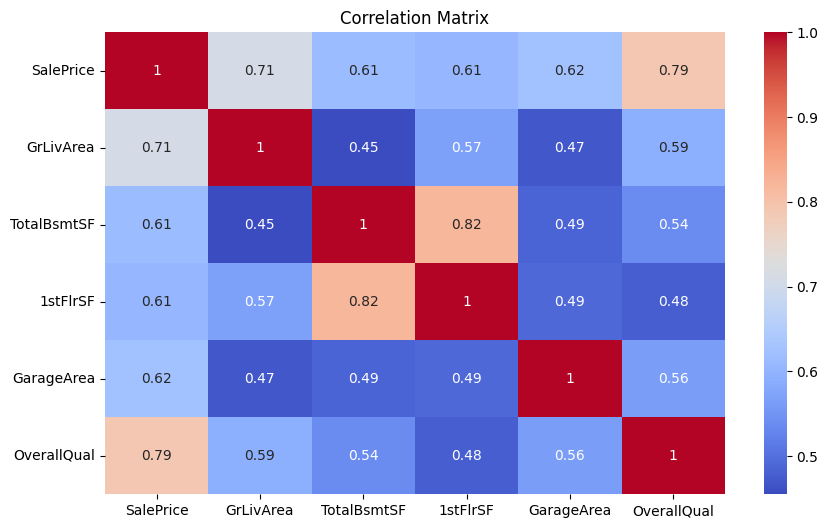

In [ ]:
num_features = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'OverallQual']
plt.figure(figsize=(10,6))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 5. Enhanced Feature Structuring

#### Here we have creating a 3 different feature for further pricing analysis
1. PricePerSqFt --> Which shows the Price of per Square Feet for the house
2. HouseAge --> Which shows that how old our house is
3. Remodeled --> The house is remodeled or not

In [10]:
plt.figure(figsize=(10,6))
# Price per square foot
df['PricePerSqFt'] = df['SalePrice'] / df['GrLivArea']

# Age of the house at sale time
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

# Remodeled or not
df['Remodeled'] = (df['YearRemodAdd'] != df['YearBuilt']).astype(int)

<Figure size 1000x600 with 0 Axes>

#### Pair Plot : to explore relationships between multiple variables in a dataset
Here we are taking the different Features to make explore relation between them via Pair Plot, Below are the features

1. SalePrice :- Sales Price
2. FullBath :- Full bathrooms above grade
3. BedroomAbvGr :- Bedrooms above grade
4. TotalBsmtSF :- Total square feet of basement area
5. GrLivArea :- Above grade (ground) living area square feet

<Figure size 1000x600 with 0 Axes>

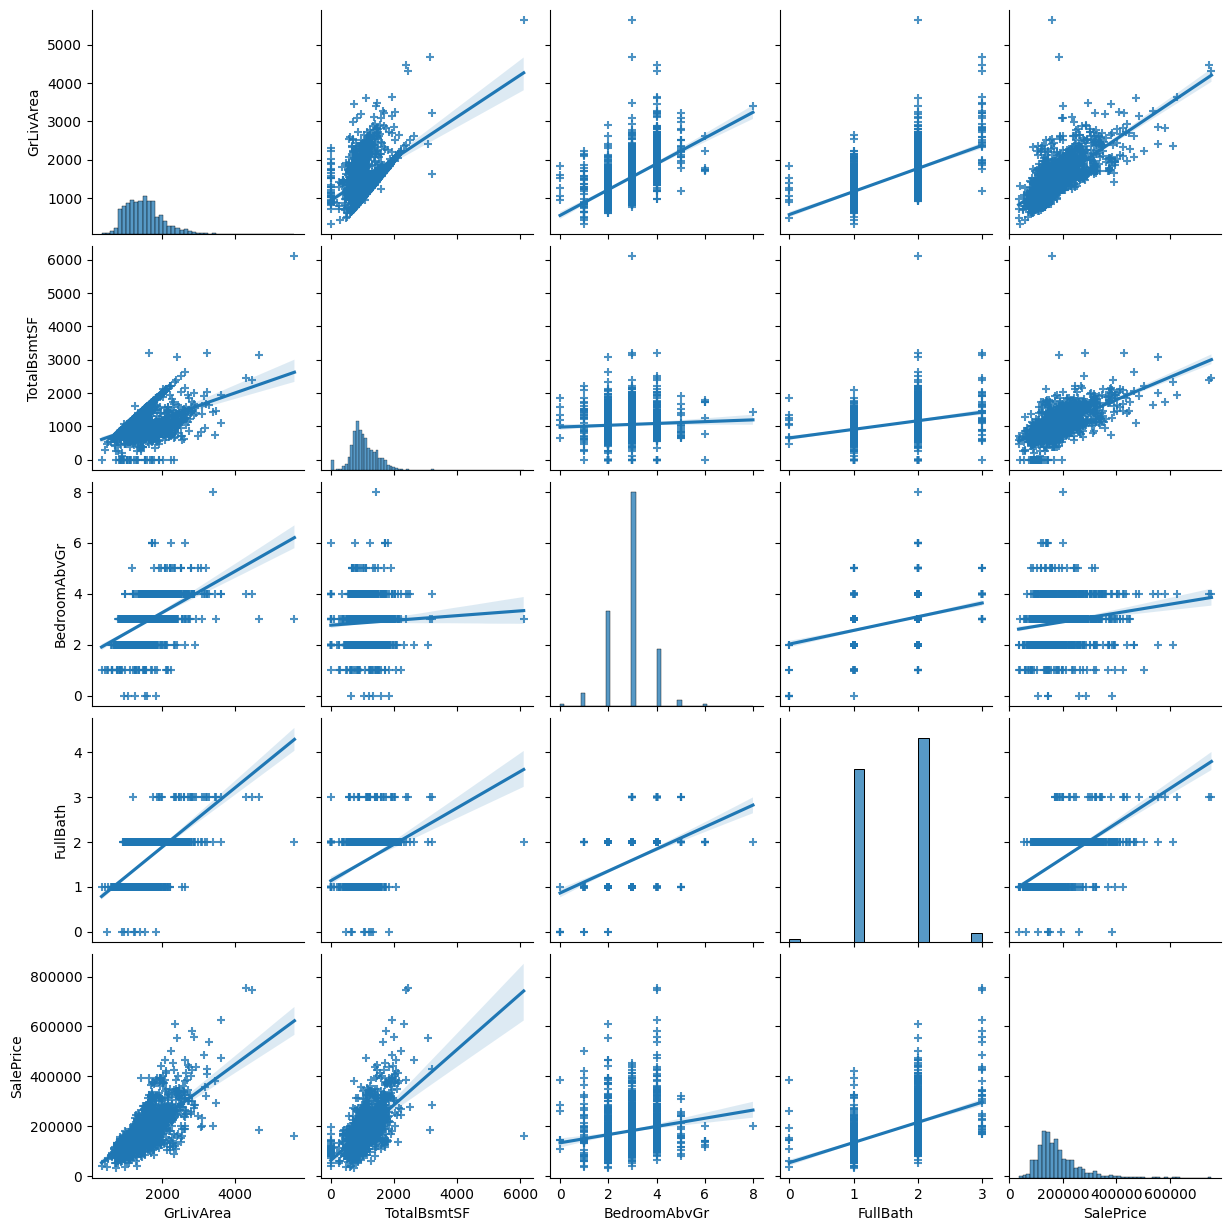

In [ ]:
sns.pairplot(df, vars=['GrLivArea', 'TotalBsmtSF', 'BedroomAbvGr', 'FullBath', 'SalePrice'], kind='reg', markers='+')
plt.show()

## 6. Size Impact & Feature Analysis

BedroomAbvGr
0    221493.166667
1    173162.420000
2    158197.659218
3    181056.870647
4    220421.253521
5    180819.047619
6    143779.000000
8    200000.000000
Name: SalePrice, dtype: float64


c:\Users\Dmund\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Dmund\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 68.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Dmund\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Dmund\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 47.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

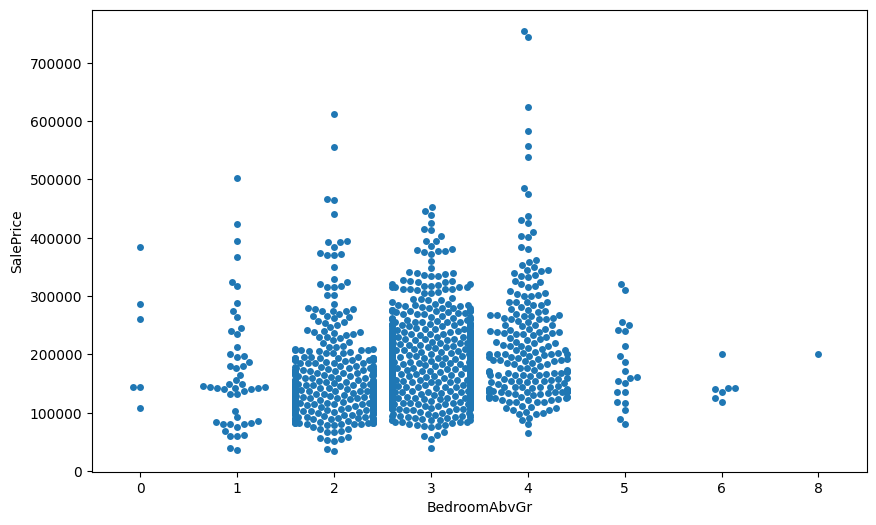

In [21]:
plt.figure(figsize=(10,6))
# Average price by bedroom count
print(df.groupby('BedroomAbvGr')['SalePrice'].mean())
sns.swarmplot(x='BedroomAbvGr', y='SalePrice', data=df)
plt.show()

BedroomAbvGr
0    221493.166667
1    173162.420000
2    158197.659218
3    181056.870647
4    220421.253521
5    180819.047619
6    143779.000000
8    200000.000000
Name: SalePrice, dtype: float64


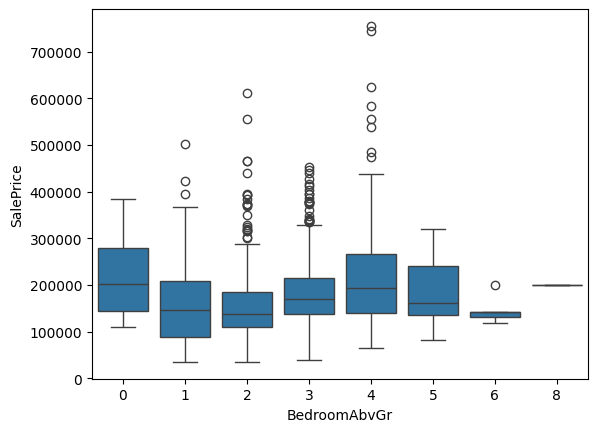

In [22]:
# Average price by bedroom count
print(df.groupby('BedroomAbvGr')['SalePrice'].mean())
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=df)
plt.show()

## 7. Market Trends & Historical Pricing

#### Line Plot : The line plot helps to show the Trend over a Time
The plot showing the Total Sales Price at different year

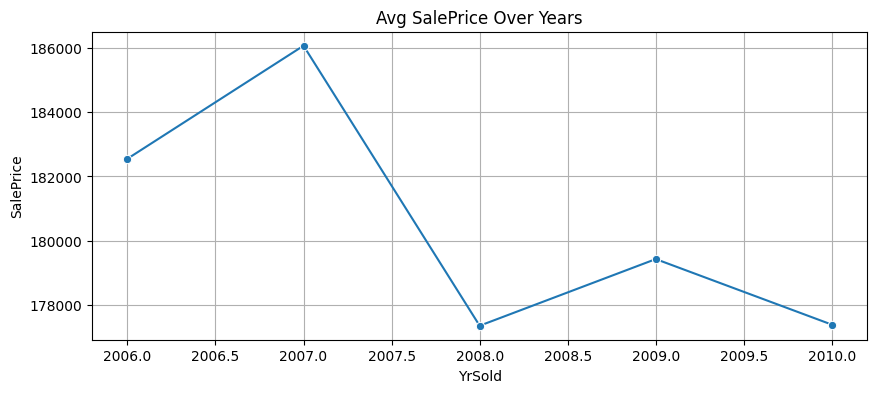

In [14]:
# Aggregate by year/month
by_year = df.groupby('YrSold')['SalePrice'].mean().reset_index()
plt.figure(figsize=(10, 4))
sns.lineplot(x='YrSold', y='SalePrice', data=by_year, marker='o')
plt.title('Avg SalePrice Over Years')
plt.grid(True)
plt.show()

## 8. Amenities & Customer Preferences

#### Box Plot :
The Box plot helps to visualize that how different Amenities and the Customer Preferences affect to the Sale Price of a House and which are the data point that significantly deviates from other observations in a dataset

Here we have taken the 3 different Amenities
* Garage Effect on Sales Price
* Pool Effect on Sales Price
* Central Air Effect on Sales Price

c:\Users\Dmund\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Dmund\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 59.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


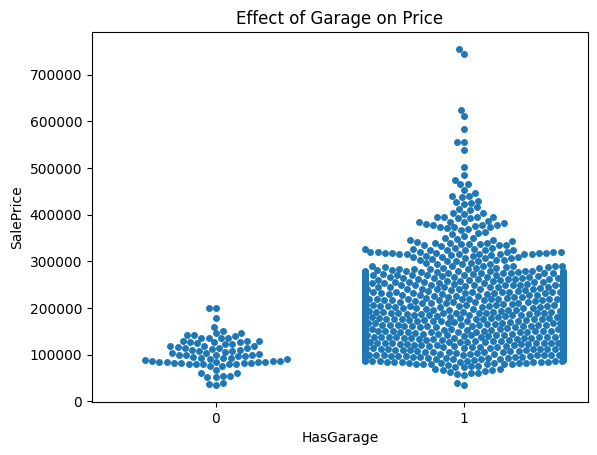

c:\Users\Dmund\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 41.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Dmund\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 61.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


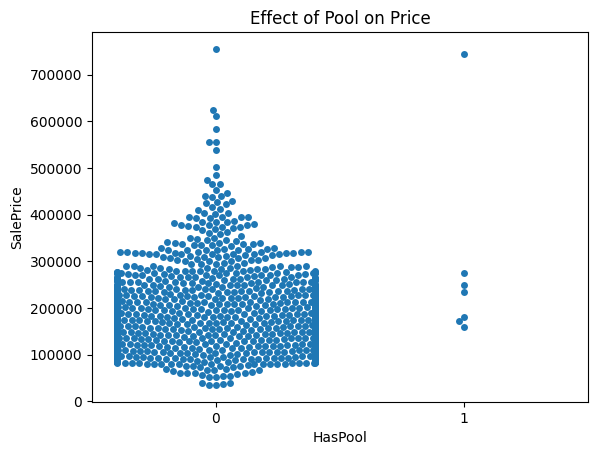

c:\Users\Dmund\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 39.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Dmund\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


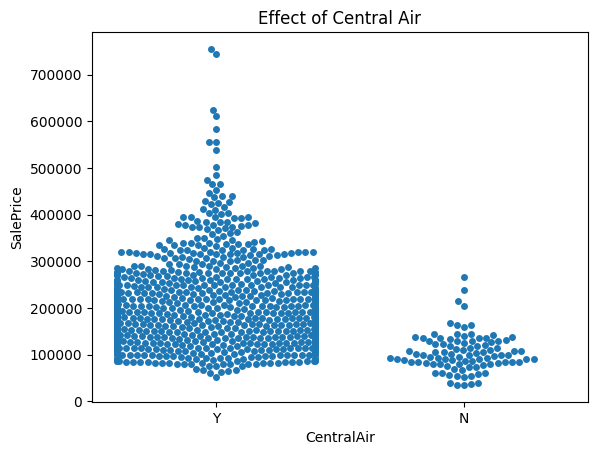

In [16]:
# Garage presence effect
df['HasGarage'] = (df['GarageArea'] > 0).astype(int)
sns.swarmplot(x='HasGarage', y='SalePrice', data=df)
plt.title('Effect of Garage on Price')
plt.show()

# Pool effect
df['HasPool'] = (df['PoolArea'] > 0).astype(int)
sns.swarmplot(x='HasPool', y='SalePrice', data=df)
plt.title('Effect of Pool on Price')
plt.show()

# Central Air Impact
sns.swarmplot(x='CentralAir', y='SalePrice', data=df)
plt.title('Effect of Central Air')
plt.show()

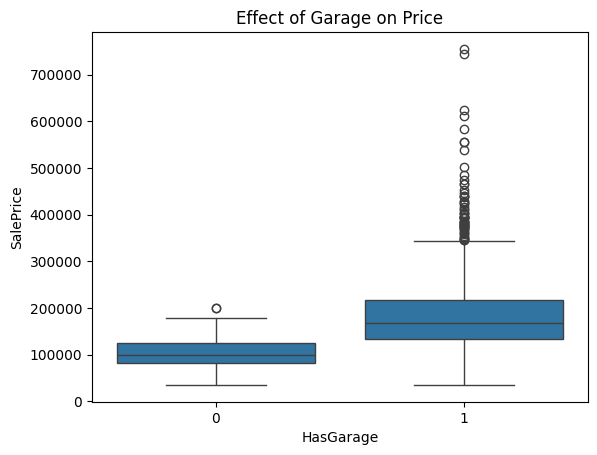

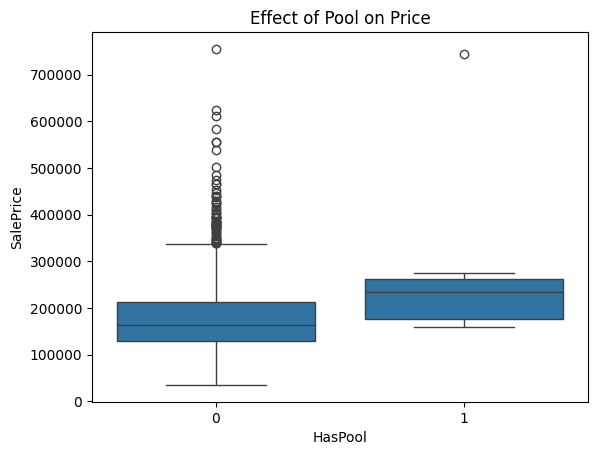

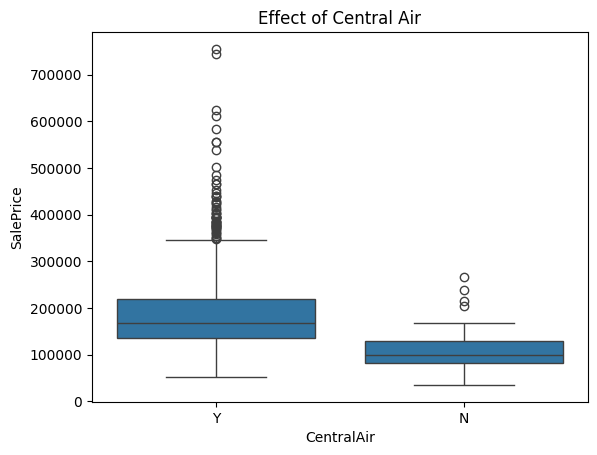

In [23]:
# Garage presence effect
df['HasGarage'] = (df['GarageArea'] > 0).astype(int)
sns.boxplot(x='HasGarage', y='SalePrice', data=df)
plt.title('Effect of Garage on Price')
plt.show()

# Pool effect
df['HasPool'] = (df['PoolArea'] > 0).astype(int)
sns.boxplot(x='HasPool', y='SalePrice', data=df)
plt.title('Effect of Pool on Price')
plt.show()

# Central Air Impact
sns.boxplot(x='CentralAir', y='SalePrice', data=df)
plt.title('Effect of Central Air')
plt.show()

## 9. Skewness & Kurtosis for Key Features

In [24]:
plt.figure(figsize=(10,6))
features = ['GrLivArea', 'TotalBsmtSF', 'PricePerSqFt', 'PoolArea', 'GarageArea', 'HouseAge', 'Remodeled']
for col in features:
    print(f"{col} skew: {df[col].skew():.2f}, kurtosis: {df[col].kurtosis():.2f}")


GrLivArea skew: 1.37, kurtosis: 4.90
TotalBsmtSF skew: 1.52, kurtosis: 13.25
PricePerSqFt skew: 0.38, kurtosis: 0.87
PoolArea skew: 14.83, kurtosis: 223.27
GarageArea skew: 0.18, kurtosis: 0.92
HouseAge skew: 0.61, kurtosis: -0.44
Remodeled skew: 0.09, kurtosis: -1.99


<Figure size 1000x600 with 0 Axes>